In [1]:
import numpy as np

In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
n = 5 #liczba klientow
Q = 20 #pojemnosc pojazdow
N = [i for i in range(1, n+1)] #indeksy klinetow
V = [0] + N # indeksy pojazdow
q = {i: rnd.randint(1, Q+1) for i in N} #zapotrzebowanie klientow

In [4]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [5]:
import matplotlib.pyplot as plt

(3.4372078488218136, 177.3557353714919, 31.246203026126295, 86.1012893693383)

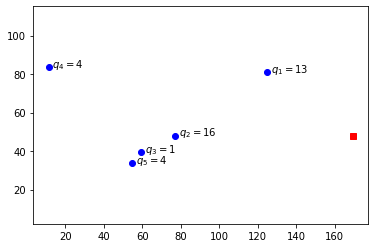

In [6]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [7]:
A = [(i, j) for i in V for j in V if i != j] #zestawienie łuków
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}#koszt przejazdu

In [8]:
print(A) #Zestawienie łuków

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4)]


In [9]:
print(c) #macierz kosztow

{(0, 1): 55.86036399879026, (0, 2): 92.57429501811312, (0, 3): 110.270593126257, (0, 4): 162.11929173663975, (0, 5): 115.77197753649124, (1, 0): 55.86036399879026, (1, 2): 58.23944767385622, (1, 3): 77.52823703144986, (1, 4): 113.39535450847495, (1, 5): 84.73210792591694, (2, 0): 92.57429501811312, (2, 1): 58.23944767385622, (2, 3): 19.435067819237894, (2, 4): 74.58388094238103, (2, 5): 26.506530582876824, (3, 0): 110.270593126257, (3, 1): 77.52823703144986, (3, 2): 19.435067819237894, (3, 4): 65.45912999573686, (3, 5): 7.445550743679192, (4, 0): 162.11929173663975, (4, 1): 113.39535450847495, (4, 2): 74.58388094238103, (4, 3): 65.45912999573686, (4, 5): 65.97047852913248, (5, 0): 115.77197753649124, (5, 1): 84.73210792591694, (5, 2): 26.506530582876824, (5, 3): 7.445550743679192, (5, 4): 65.97047852913248}


In [10]:
from docplex.mp.model import Model

In [11]:
mdl = Model('CVRP')

In [12]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [13]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A)) #minimalizowanie kosztu
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N) #symetryczny CVRP
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N) #symetryczny CVRP
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15 #parametr czasowy
solution = mdl.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-11 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 1073.193043 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 5 rows and 2 columns.
MIP Presolve modified 9 coefficients.
Aggregator did 9 substitutions.
Reduced MIP has 23 rows, 42 columns, and 81 nonzeros.
Reduced MIP has 28 binaries, 0 generals, 0 SOSs, and 18 indicators.
Presolve time = 0.05 sec. (0.08 ticks)
Probing time = 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 23 rows, 42 columns, and 81 nonzeros.
Reduced MIP has 28 binaries, 0 generals, 0 SOSs, and 18 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.04 ticks)
Clique table members: 48.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution

In [14]:
print(solution)

solution for: CVRP
objective: 579.838
x_0_1=1
x_0_2=1
x_1_4=1
x_2_5=1
x_3_0=1
x_4_3=1
x_5_0=1
u_1=15.000
u_2=16.000
u_3=20.000
u_4=19.000
u_5=20.000



In [15]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [16]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(3.4372078488218136, 177.3557353714919, 31.246203026126295, 86.1012893693383)

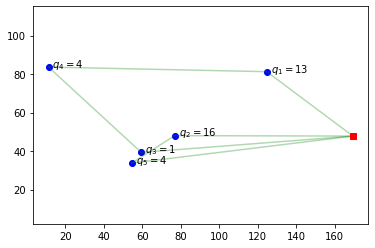

In [17]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')


In [17]:
#pip install CPLEX